#**Segunda Entrega**

El objetivo del proyecto es predecir aquellos clientes con mayor propensión a cancelar
la tarjeta de crédito del banco, lo que se conoce como Churn. Es decir, predecir el valor
de la columna Attrition_Flag.

## **Análisis**  **Exploratorio** **de** **los** **Datos** - **EDA**

Importamos librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Montamos Drive

In [2]:
from google.colab import drive 
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Leemos el archivo.csv

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/BankChurners.csv') 

Empezamos a explorar. 

In [4]:
df.sample(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9325,716979183,Existing Customer,45,M,2,College,Married,$60K - $80K,Blue,34,...,1,2,17646.0,1396,16250.0,0.851,15527,106,0.893,0.079
1718,715381533,Existing Customer,42,F,4,Post-Graduate,Single,Less than $40K,Blue,36,...,2,3,1438.3,674,764.3,1.769,2451,55,1.292,0.469
1363,715640358,Existing Customer,43,M,3,High School,Single,$40K - $60K,Blue,36,...,3,3,4112.0,768,3344.0,0.413,1334,40,0.429,0.187
3320,803124408,Attrited Customer,41,F,3,Unknown,Married,Unknown,Blue,35,...,3,5,11538.0,0,11538.0,0.507,1926,53,0.432,0.000
7028,720654183,Attrited Customer,45,M,4,Graduate,Married,$80K - $120K,Blue,35,...,3,3,23542.0,1307,22235.0,0.462,2152,46,0.438,0.056


Veamos si el dataset contiene valores nulos.

In [5]:
round(df.isnull().mean()*100,2)

CLIENTNUM                   0.0
Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

A simple vista pareciera que el dataset no contiene valores nulos pero nosotros sabemos que sí los tiene, sólo que figuran como 'Unknown'.     

In [6]:
df.Marital_Status.value_counts(normalize= True)

Married     0.462822
Single      0.389355
Unknown     0.073961
Divorced    0.073862
Name: Marital_Status, dtype: float64

Vemos que en la columna 'Marital_Status' los valores que figuran como 'Unknown' representan un 7,4% del total. Para no eliminar dichos registros lo reemplazaremos por el término 'Other'.

In [7]:
Marital_Status_dict = {'Married':'Married',
                       'Single':'Single',
                       'Unknown':'Other',
                       'Divorced':'Divorced'
                       }

In [8]:
df.Marital_Status = df.Marital_Status.map(Marital_Status_dict)

In [9]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Other,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Ahora guardaremos el dataset con el cambio efectuado en 'Marital_Status' para luego volver a levantarlo pero aclarándole a python que los valores que figuran como 'Unknown' los tome como nulos. 

In [10]:
df.to_csv('/content/drive/MyDrive/Data_Science/BankChurners_modificado.csv', index = False)

In [11]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/BankChurners_modificado.csv',na_values='Unknown')

In [12]:
round(df.isnull().mean()*100,2)

CLIENTNUM                    0.00
Attrition_Flag               0.00
Customer_Age                 0.00
Gender                       0.00
Dependent_count              0.00
Education_Level             15.00
Marital_Status               0.00
Income_Category             10.98
Card_Category                0.00
Months_on_book               0.00
Total_Relationship_Count     0.00
Months_Inactive_12_mon       0.00
Contacts_Count_12_mon        0.00
Credit_Limit                 0.00
Total_Revolving_Bal          0.00
Avg_Open_To_Buy              0.00
Total_Amt_Chng_Q4_Q1         0.00
Total_Trans_Amt              0.00
Total_Trans_Ct               0.00
Total_Ct_Chng_Q4_Q1          0.00
Avg_Utilization_Ratio        0.00
dtype: float64

Ahora sí se puede ver que las columnas 'Education_Level' y 'Income_Category' contienen un 15% y 11% de valores nulos respectivamente.

¿Qué tamaño tiene nuestro dataframe?

In [13]:
df.shape

(10127, 21)

Hagamos un info() para visualizar qué y cuántas columnas contiene nuestro dataframe, el tipo de dato de cada una, la extensión del mismo, etc.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           9015 non-null   object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Ahora vamos a proceder a aplicar One Hot Encoder al que va a ser nuestro target, 'Attrition_Flag' y a continuación realizaremos un gráfico apropiado que nos ayude a entenderlo.

In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
enc = OneHotEncoder( sparse=False)
encoded_attrition = enc.fit_transform(df.Attrition_Flag.values.reshape(-1,1))

In [17]:
encoded_attrition_columns = enc.get_feature_names(['Att_Flag'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
encoded_attrition_df = pd.DataFrame(data=encoded_attrition, columns= encoded_attrition_columns)


In [19]:
df = pd.concat([df.reset_index(drop=True), encoded_attrition_df], axis=1).drop(['Attrition_Flag','Att_Flag_Existing Customer'], axis = 1)
df.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Att_Flag_Attrited Customer
0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.0
1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.0
2,713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.0
3,769911858,40,F,4,High School,Other,Less than $40K,Blue,34,3,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.0
4,709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.0


In [20]:
df = df.rename(columns= {'Att_Flag_Attrited Customer':'Att_Flag_Attrited_Customer'})

Grafiquemos con un countplot nuestro target

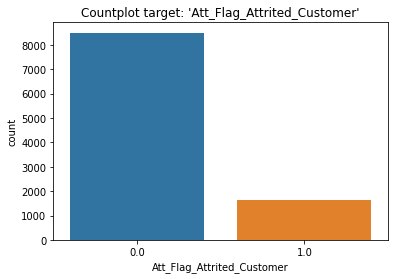


0.0    0.83934
1.0    0.16066
Name: Att_Flag_Attrited_Customer, dtype: float64


In [21]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes()
sns.countplot(x= 'Att_Flag_Attrited_Customer', data= df)
plt.title("Countplot target: 'Att_Flag_Attrited_Customer'")
plt.show()
print()
print(df['Att_Flag_Attrited_Customer'].value_counts(normalize= True))

Se puede observar que las clases están desbalanceadas. Tenemos un 84% de clientes vigentes y un 16% de clientes que han cancelado la targeta de crédito del banco.

##Responderemos algunas preguntas generales del dominio

¿Cantidad
de personas que cancelan la tarjeta según sus ingresos?

In [22]:
group_by_Income_Category = df.groupby('Income_Category', as_index = False).agg({'Att_Flag_Attrited_Customer':'sum'})
group_by_Income_Category.sort_values(by='Att_Flag_Attrited_Customer', ascending=False).head()

,Income_Category,Att_Flag_Attrited_Customer
4,Less than $40K,612.0
1,$40K - $60K,271.0
3,$80K - $120K,242.0
2,$60K - $80K,189.0
0,$120K +,126.0


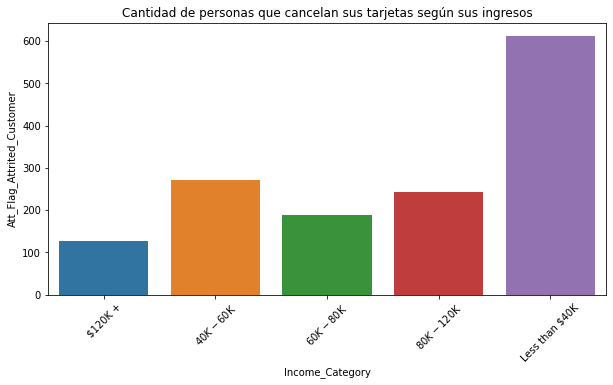

In [23]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax = sns.barplot(x= group_by_Income_Category['Income_Category'], y= group_by_Income_Category['Att_Flag_Attrited_Customer'])
plt.xticks(rotation= 45)
plt.title("Cantidad de personas que cancelan sus tarjetas según sus ingresos")
plt.show()

¿Cantidad
de personas que cancelan la tarjeta según sus dependientes?

In [24]:
group_by_Dependent_count = df.groupby('Dependent_count', as_index = False).agg({'Att_Flag_Attrited_Customer':'sum'})
group_by_Dependent_count.sort_values(by='Att_Flag_Attrited_Customer', ascending=False).head(8)

,Dependent_count,Att_Flag_Attrited_Customer
3,3,482.0
2,2,417.0
1,1,269.0
4,4,260.0
0,0,135.0
5,5,64.0


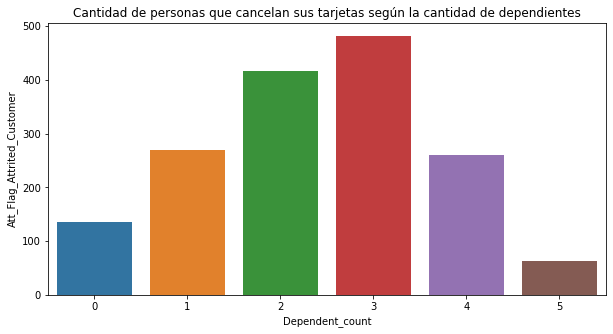

In [25]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax = sns.barplot(x= group_by_Dependent_count['Dependent_count'] , y= group_by_Dependent_count['Att_Flag_Attrited_Customer'])
plt.title("Cantidad de personas que cancelan sus tarjetas según la cantidad de dependientes")
plt.show()

¿Cuál es la edad promedio de los clientes?

In [26]:
df.Customer_Age.mean()

46.32596030413745

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


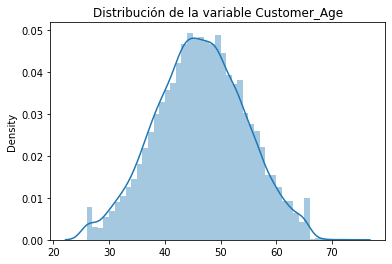

In [27]:
fig = plt.figure(figsize= (6,4))
ax = plt.axes()
ax = sns.distplot(x= df.Customer_Age)
ax.set_title("Distribución de la variable Customer_Age")
plt.show()

¿Cuál es el nivel educativo más frecuente?

In [28]:
df.Education_Level.value_counts()

Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

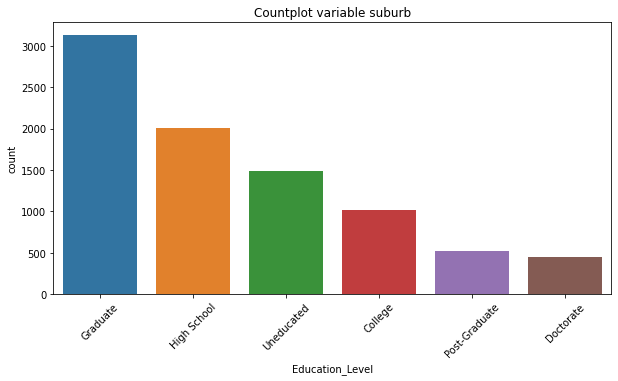

In [29]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax = sns.countplot(x='Education_Level', data=df, order=df.Education_Level.value_counts().index)
plt.xticks(rotation= 45)
plt.title("Countplot variable suburb")
plt.show()

Relación entre el género, edad de los clientes y el ratio promedio de utilización de la tarjeta.

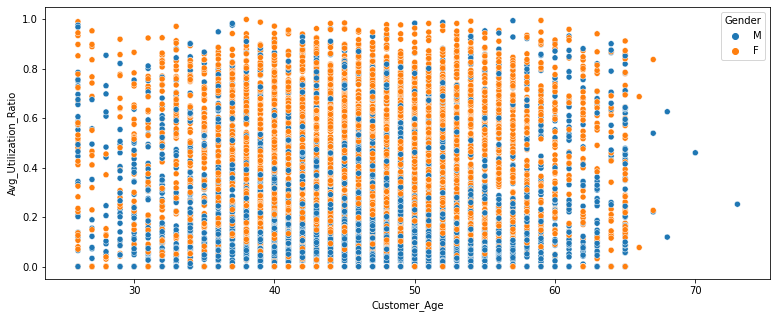

In [30]:
fig = plt.figure(figsize=(13,5))
ax = plt.axes()
ax = sns.scatterplot(data=df, x= 'Customer_Age', y= 'Avg_Utilization_Ratio', hue= 'Gender')
plt.show()

Entre 35 a 60 años, las mujeres tienen un mayor ratio promedio de utilización de la tarjeta.

De entre los clientes vigentes, ¿Cuál es la cantidad y monto promedio de transacciones?

In [31]:
df[df.Att_Flag_Attrited_Customer == 0].Total_Trans_Ct.mean()

68.67258823529411

In [32]:
df[df.Att_Flag_Attrited_Customer == 0].Total_Trans_Amt.mean()

4654.655882352941

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


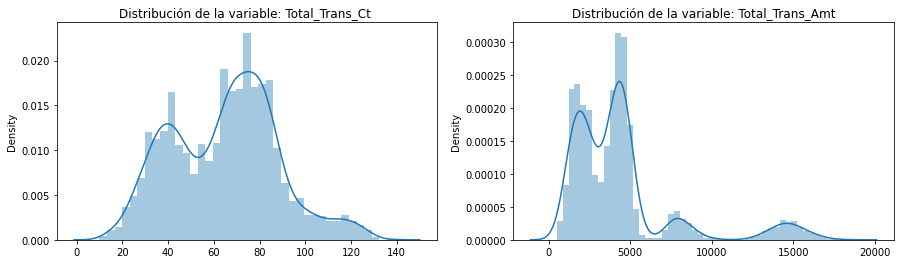

In [33]:
fig, axes = plt.subplots( ncols=2, figsize=(15,4))
axes[0].set_title(f"Distribución de la variable: Total_Trans_Ct ")
sns.distplot(x=df['Total_Trans_Ct'], ax=axes[0])
axes[1].set_title(f"Distribución de la variable: Total_Trans_Amt")
sns.distplot(x=df['Total_Trans_Amt'], ax=axes[1])
plt.show()

¿Cómo se distribuye, entre los clientes vigentes, los tipos de tarjetas?

In [34]:
exist_customer_df = df[df.Att_Flag_Attrited_Customer == 0]
exist_customer_df.Card_Category.value_counts( normalize=True)

Blue        0.931412
Silver      0.055647
Gold        0.011176
Platinum    0.001765
Name: Card_Category, dtype: float64

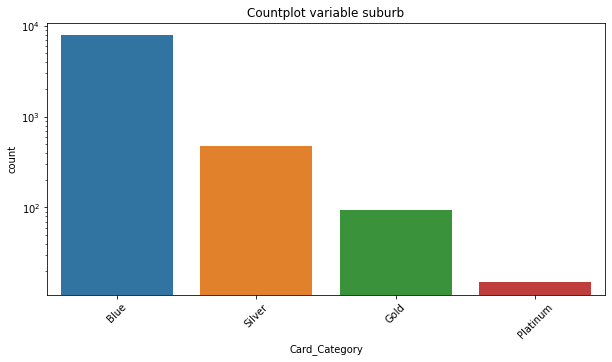

In [35]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax = sns.countplot(x='Card_Category', data= exist_customer_df, order= exist_customer_df.Card_Category.value_counts().index)
ax.set_yscale('log')
plt.xticks(rotation= 45)
plt.title("Countplot variable suburb")
plt.show()

El único fin del siguiente gráfico, es permitirnos ver la correlación entre las distintas variables (y la correlación con nuestro target). Si dos variables, cualquiera sean éstas, tienen una correlación muy alta (arriba de 0.9) y son relevantes para nuestro target, una de ellas debe ser eliminada.

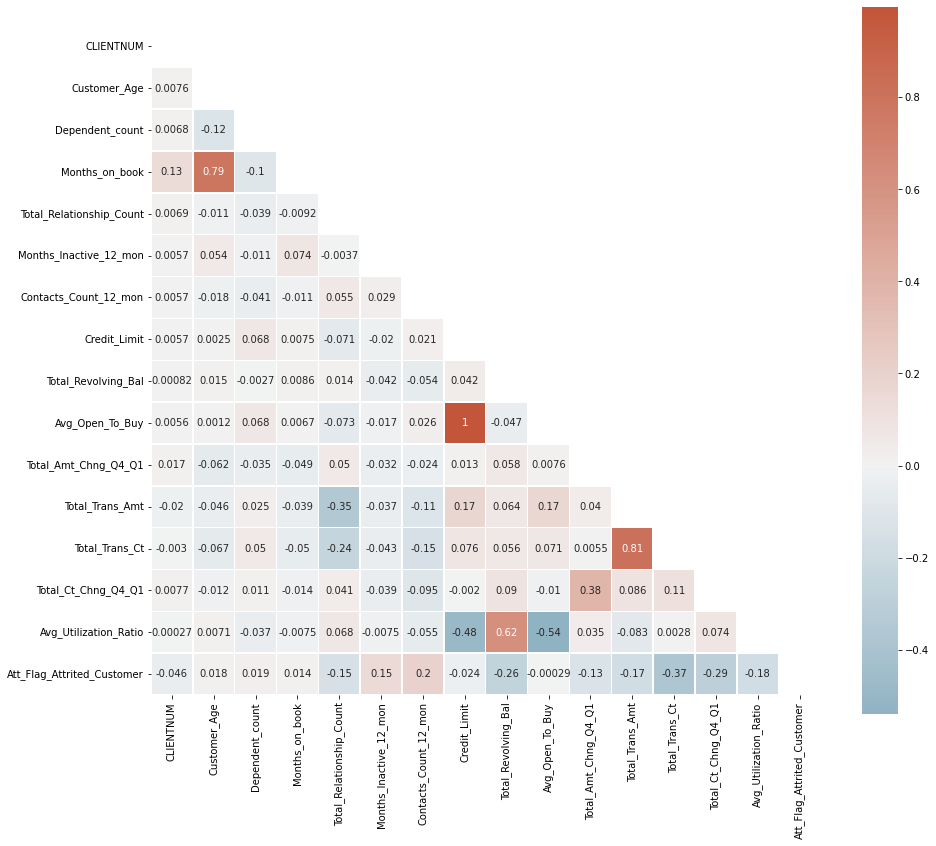

In [36]:
#  Genera una máscara para el triángulo superior.
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(15, 13))

# Genere un mapa de colores divergentes personalizado
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Dibuja el mapa de calor con la máscara y la relación de aspecto correcta
sns.heatmap(df.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True)


Como se puede observar, hay dos variables que tienen una correlación muy alta entre sí, a saber: 'Credit_Limit' y 'Avg_Open_To_Buy' pero son irrelevantes para nuestro target.

Ahora veamos específicamente la correlación que tienen las variables con nuestro target 'Att_Flag_Attrited_Customer' para ir descartando aquellas que no van a sumar o aportar algo a nuestros futuros modelos.

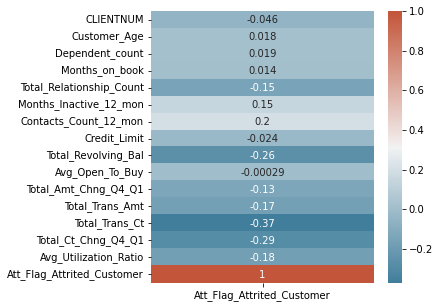

In [37]:
target_corr = pd.DataFrame(df.corr()['Att_Flag_Attrited_Customer'], index= df.corr().index)

plt.figure(figsize=(5,5))
sns.heatmap(target_corr, annot=True, cmap=cmap)

plt.show()

Se pondrá en órden, por el momento, las 5 features de mayor correlación:


*   Total_Trans_Ct: Cantidad total de transacciones (-0,37);
*   Total_Ct_Chng_Q4_Q1: Cambios en la cantidad de transacciones (-0,29);
*   Total_Revolving_Bal: un saldo renovable, es la parte del gasto de la tarjeta de crédito que no se paga al final de un ciclo de facturación (-0,26);
*   Contacts_Count_12_mon: Cantidad de veces que se contactó al cliente en los
últimos 12 meses (0,20);
*   Avg_Utilization_Ratio: promedio de utilización de la tarjeta (-0,18).








Por lo que, a continuación, dropearemos aquellas que tienen la menor influencia.

In [38]:
to_drop = ['CLIENTNUM', 'Customer_Age','Dependent_count','Months_on_book','Credit_Limit','Avg_Open_To_Buy']

In [39]:
df = df.drop(columns = to_drop)

In [40]:
df.head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Att_Flag_Attrited_Customer
0,M,High School,Married,$60K - $80K,Blue,5,1,3,777,1.335,1144,42,1.625,0.061,0.0
1,F,Graduate,Single,Less than $40K,Blue,6,1,2,864,1.541,1291,33,3.714,0.105,0.0
2,M,Graduate,Married,$80K - $120K,Blue,4,1,0,0,2.594,1887,20,2.333,0.000,0.0
3,F,High School,Other,Less than $40K,Blue,3,4,1,2517,1.405,1171,20,2.333,0.760,0.0
4,M,Uneducated,Married,$60K - $80K,Blue,5,1,0,0,2.175,816,28,2.500,0.000,0.0


¿Cuántas columnas tiene ahora el dataframe?

In [41]:
df.shape[1]

15

Ya se eliminó 6 de un total de 20 features. Seguidamente se procederá a realizar todo el preprocesamiento necesario para nuevamente determinar cuales son las features de mayor correlación con nuestro target y recién entonces incorporarlas a los modelos de clasificación estudiados.

Primero que nada, por estar frente a un problema de aprendizaje supervisado, debemos separar nuestro dataset en 'X' e 'y'.

In [42]:
X = df.drop('Att_Flag_Attrited_Customer', axis= 1)
y = df[['Att_Flag_Attrited_Customer']].copy()

Seguidamente separemos en train_test_split.
Vamos a tomar un 15% de los datos para el conjunto de test. Como las clases no están balanceadas (como se observó en el countplot de nuestro target), utilizaremos el stratify que nos provee sklearn 

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8607, 14)
(1520, 14)
(8607, 1)
(1520, 1)


## Preprocesamiento de datos
### Variables Categóricas
Veamos qué tenemos respecto a variables categóricas.

In [46]:
def cantidad_y_valores_x_columnas(df:pd.DataFrame,columna:list):
  for col in df[columna]:
    print(f'Cantidad de valores de la columna {col}: {df[col].nunique()}')
    print("------------------------------------------------------------------")
    print(f' Valores de la columna {col}: {df[col].unique()}')
    print("------------------------------------------------------------------")
  

In [47]:
columns_cat = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category']

In [48]:
cantidad_y_valores_x_columnas(df,columns_cat)

Cantidad de valores de la columna Gender: 2
------------------------------------------------------------------
 Valores de la columna Gender: ['M' 'F']
------------------------------------------------------------------
Cantidad de valores de la columna Education_Level: 6
------------------------------------------------------------------
 Valores de la columna Education_Level: ['High School' 'Graduate' 'Uneducated' nan 'College' 'Post-Graduate'
 'Doctorate']
------------------------------------------------------------------
Cantidad de valores de la columna Marital_Status: 4
------------------------------------------------------------------
 Valores de la columna Marital_Status: ['Married' 'Single' 'Other' 'Divorced']
------------------------------------------------------------------
Cantidad de valores de la columna Income_Category: 5
------------------------------------------------------------------
 Valores de la columna Income_Category: ['$60K - $80K' 'Less than $40K' '$80K - $120K'

En función a lo anterior, aplicaremos:


*   'Gender' One Hot Encoder;
*   'Marital_Status' Label Encoder;
*   'Education_Level', 'Income_Category',
       'Card_Category' por tener intríncicamente implicadas un órden usaremos un map o replace.

Apliquemos One Hot Encoder a 'Gender'.

In [49]:
ohe_gender = OneHotEncoder(sparse=False)
ohe_gender.fit(X_train[["Gender"]])

OneHotEncoder(sparse=False)

In [50]:
gender = ohe_gender.transform(X_train[["Gender"]])
encoded_gender_df = pd.DataFrame(data=gender, columns= ohe_gender.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [51]:
X_train = pd.concat([X_train.reset_index(drop=True), encoded_gender_df], axis=1)
X_train = X_train.drop(['Gender','x0_F'], axis=1)
X_train = X_train.rename(columns={'x0_M': 'Male'})
X_train.head()

,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Male
0,Graduate,Married,Less than $40K,Blue,4,2,2,0,0.916,2925,46,0.353,0.000,0.0
1,NaN,Married,Less than $40K,Blue,5,3,3,974,0.624,4170,73,0.553,0.480,0.0
2,Post-Graduate,Married,Less than $40K,Blue,4,3,2,1483,1.362,2400,60,0.622,0.720,0.0
3,College,Married,$80K - $120K,Blue,2,3,3,1449,0.559,7527,58,0.657,0.152,1.0
4,High School,Married,$60K - $80K,Blue,5,1,3,777,1.335,1144,42,1.625,0.061,1.0


In [52]:
gender = ohe_gender.transform(X_test[["Gender"]])
encoded_gender_df = pd.DataFrame(data=gender, columns= ohe_gender.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [53]:
X_test = pd.concat([X_test.reset_index(drop=True), encoded_gender_df], axis=1)
X_test = X_test.drop(['Gender','x0_F'], axis=1)
X_test = X_test.rename(columns={'x0_M': 'Male'})
X_test.head()

,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Male
0,High School,Married,Less than $40K,Blue,5,2,0,2517,1.144,1627,38,0.652,0.790,0.0
1,Graduate,Married,$80K - $120K,Blue,4,6,4,2379,0.358,1343,35,0.296,0.928,1.0
2,NaN,Single,$60K - $80K,Blue,2,2,1,2517,0.945,14213,100,0.786,0.262,1.0
3,High School,Single,$60K - $80K,Blue,4,3,3,1355,0.660,1939,30,0.500,0.272,1.0
4,Graduate,Married,Less than $40K,Blue,3,2,3,2517,0.934,8123,71,0.732,0.364,1.0


Apliquemos Label Encoder a 'Marital_Status'.

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
le = LabelEncoder()
le.fit(X_train[["Marital_Status"]])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [56]:
X_train["Marital_Status"] = le.transform(X_train[["Marital_Status"]])
X_train.head()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Male
0,Graduate,1,Less than $40K,Blue,4,2,2,0,0.916,2925,46,0.353,0.000,0.0
1,NaN,1,Less than $40K,Blue,5,3,3,974,0.624,4170,73,0.553,0.480,0.0
2,Post-Graduate,1,Less than $40K,Blue,4,3,2,1483,1.362,2400,60,0.622,0.720,0.0
3,College,1,$80K - $120K,Blue,2,3,3,1449,0.559,7527,58,0.657,0.152,1.0
4,High School,1,$60K - $80K,Blue,5,1,3,777,1.335,1144,42,1.625,0.061,1.0


In [57]:
X_test["Marital_Status"] = le.transform(X_test[["Marital_Status"]])
X_test.head()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Male
0,High School,1,Less than $40K,Blue,5,2,0,2517,1.144,1627,38,0.652,0.790,0.0
1,Graduate,1,$80K - $120K,Blue,4,6,4,2379,0.358,1343,35,0.296,0.928,1.0
2,NaN,3,$60K - $80K,Blue,2,2,1,2517,0.945,14213,100,0.786,0.262,1.0
3,High School,3,$60K - $80K,Blue,4,3,3,1355,0.660,1939,30,0.500,0.272,1.0
4,Graduate,1,Less than $40K,Blue,3,2,3,2517,0.934,8123,71,0.732,0.364,1.0


Continuemos creando los diccionarios para las siguientes features: 'Education_Level', 'Income_Category', 'Card_Category'. Luego aplicaremos  Replace.

In [58]:
education_level_dict = {'Uneducated': 0,
                        'High School': 1,
                        'Graduate': 2,
                        'College': 3,
                        'Post-Graduate': 4,
                        'Doctorate': 5
                        }

In [59]:
income_category_dict = {'Less than $40K': 0,
                        '$40K - $60K': 1,
                        '$60K - $80K': 2,
                        '$80K - $120K': 3,
                        '$120K +': 4
                        }

In [60]:
card_category_dict = {'Blue': 0,
                      'Silver': 1,
                      'Gold': 2,
                      'Platinum': 3
                      }

In [61]:
X_train.Education_Level = X_train.Education_Level.replace(education_level_dict)
X_test.Education_Level = X_test.Education_Level.replace(education_level_dict)

In [62]:
X_train.Income_Category = X_train.Income_Category.replace(income_category_dict)
X_test.Income_Category = X_test.Income_Category.replace(income_category_dict)

In [63]:
X_train.Card_Category = X_train.Card_Category.replace(card_category_dict)
X_test.Card_Category = X_test.Card_Category.replace(card_category_dict)

In [64]:
X_train.head()

,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Male
0,2.0,1,0.0,0,4,2,2,0,0.916,2925,46,0.353,0.000,0.0
1,NaN,1,0.0,0,5,3,3,974,0.624,4170,73,0.553,0.480,0.0
2,4.0,1,0.0,0,4,3,2,1483,1.362,2400,60,0.622,0.720,0.0
3,3.0,1,3.0,0,2,3,3,1449,0.559,7527,58,0.657,0.152,1.0
4,1.0,1,2.0,0,5,1,3,777,1.335,1144,42,1.625,0.061,1.0


In [65]:
X_test.head()

,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Male
0,1.0,1,0.0,0,5,2,0,2517,1.144,1627,38,0.652,0.790,0.0
1,2.0,1,3.0,0,4,6,4,2379,0.358,1343,35,0.296,0.928,1.0
2,NaN,3,2.0,0,2,2,1,2517,0.945,14213,100,0.786,0.262,1.0
3,1.0,3,2.0,0,4,3,3,1355,0.660,1939,30,0.500,0.272,1.0
4,2.0,1,0.0,0,3,2,3,2517,0.934,8123,71,0.732,0.364,1.0


### Análisis varibales numéricas

Veamos algunas medidas estadísticas tanto en el set de train como en el de test.

In [66]:
X_train.describe()

,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Male
count,7322.000000,8607.000000,7667.000000,8607.000000,8607.000000,8607.000000,8607.000000,8607.000000,8607.0000,8607.000000,8607.000000,8607.000000,8607.000000,8607.000000
mean,1.810571,1.774021,1.340811,0.083653,3.811781,2.342512,2.456257,1164.962472,0.7600,4390.543627,64.743929,0.713012,0.274957,0.471361
std,1.309202,1.046639,1.352856,0.334993,1.555432,1.011569,1.109048,814.194850,0.2196,3391.576086,23.566633,0.240837,0.275424,0.499208
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0000,510.000000,10.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000,2.000000,398.000000,0.6300,2141.500000,45.000000,0.581000,0.023500,0.000000
50%,2.000000,1.000000,1.000000,0.000000,4.000000,2.000000,2.000000,1283.000000,0.7360,3899.000000,67.000000,0.702000,0.177000,0.000000
75%,2.000000,3.000000,2.000000,0.000000,5.000000,3.000000,3.000000,1785.000000,0.8600,4741.000000,81.000000,0.818000,0.501500,1.000000
max,5.000000,3.000000,4.000000,3.000000,6.000000,6.000000,6.000000,2517.000000,3.3970,17995.000000,139.000000,3.714000,0.995000,1.000000


In [67]:
X_test.describe()

,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Male
count,1286.000000,1520.000000,1348.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000
mean,1.842924,1.805921,1.355341,0.083553,3.817105,2.333553,2.450000,1150.648684,0.759607,4480.771711,65.508553,0.707749,0.274533,0.468421
std,1.324498,1.057201,1.377190,0.326963,1.549099,1.005544,1.090446,819.623209,0.217039,3428.519527,22.929435,0.221887,0.277291,0.499166
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,563.000000,10.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000,2.000000,274.750000,0.635000,2249.000000,47.000000,0.588000,0.015500,0.000000
50%,2.000000,1.000000,1.000000,0.000000,4.000000,2.000000,2.000000,1247.000000,0.740000,3906.500000,68.000000,0.700000,0.173000,0.000000
75%,2.000000,3.000000,3.000000,0.000000,5.000000,3.000000,3.000000,1776.000000,0.857000,4737.000000,80.000000,0.817250,0.508000,1.000000
max,5.000000,3.000000,4.000000,3.000000,6.000000,6.000000,6.000000,2517.000000,2.180000,18484.000000,138.000000,2.500000,0.999000,1.000000


Con el único fin de ver (una vez realizado todo el preprocesamiento necesario) cuales son las features de mayor correlación con nuestro target, es que se volverá a unir el dataset a como era en un comienzo. Seguidamente se eliminarán las features irrelevantes (a nuestro criterio) para proceder al modelado.

In [68]:
train_df = pd.concat([X_train, y_train.reset_index(drop=True) ], axis = 1)
test_df = pd.concat([X_test, y_test.reset_index(drop=True) ], axis = 1)
df = pd.concat([train_df, test_df], axis = 0)

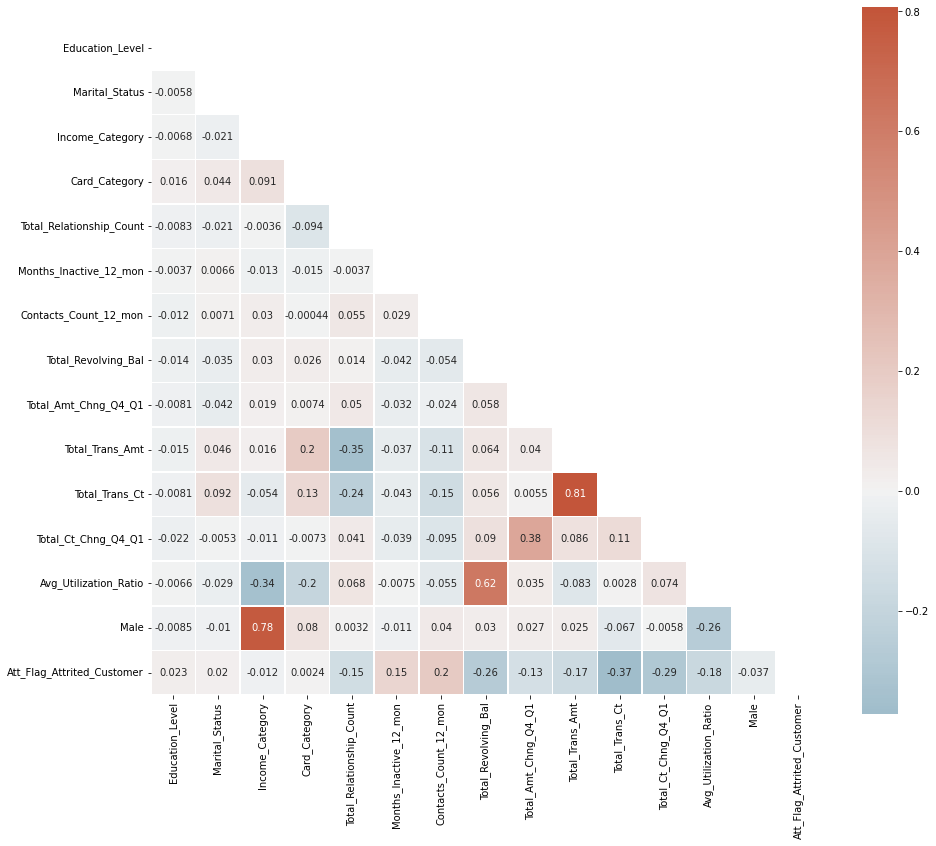

In [69]:
#  Genera una máscara para el triángulo superior.
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(15, 13))

# Genere un mapa de colores divergentes personalizado
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Dibuja el mapa de calor con la máscara y la relación de aspecto correcta
sns.heatmap(df.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True)


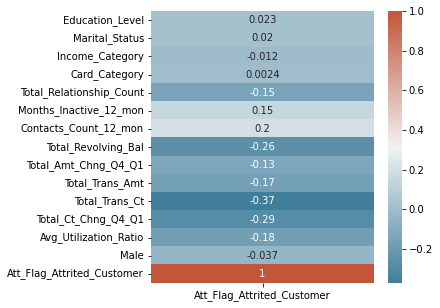

In [70]:
target_corr = pd.DataFrame(df.corr()['Att_Flag_Attrited_Customer'], index= df.corr().index)

plt.figure(figsize=(5,5))
sns.heatmap(target_corr, annot=True, cmap=cmap)

plt.show()

Como se puede observar en el último gráfico, tras la conversión de las variables categóricas, tanto el género, como el estado civil o la categoría de tarjetas o de ingresos tienen una influencia despreciable sobre nuestro target. Por lo cual, a los fines de nuestro análisis, sólo tendremos en cuenta aquellas features con la correlación más alta.

Dicho lo anterior, a continuación, dropearemos las variables irrelevantes. 

In [71]:
to_drop = ['Education_Level','Income_Category','Card_Category','Male', 'Marital_Status']

In [72]:
df = df.drop(columns= to_drop)

Ahora ¿cuántas columnas tiene el dataframe?

In [73]:
df.shape[1]

10

Al final de cuentas, nos quedamos con 9 features de las 20 que teníamos en un comienzo.

Veamos si tenemos valores nulos.

In [74]:
round(df.isnull().mean()*100,2)

Total_Relationship_Count      0.0
Months_Inactive_12_mon        0.0
Contacts_Count_12_mon         0.0
Total_Revolving_Bal           0.0
Total_Amt_Chng_Q4_Q1          0.0
Total_Trans_Amt               0.0
Total_Trans_Ct                0.0
Total_Ct_Chng_Q4_Q1           0.0
Avg_Utilization_Ratio         0.0
Att_Flag_Attrited_Customer    0.0
dtype: float64

A continuación, visualizaremos las distintas distribuciones y advertiremos (o no) la presencia de valores atípicos.

In [75]:
columnas = ['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

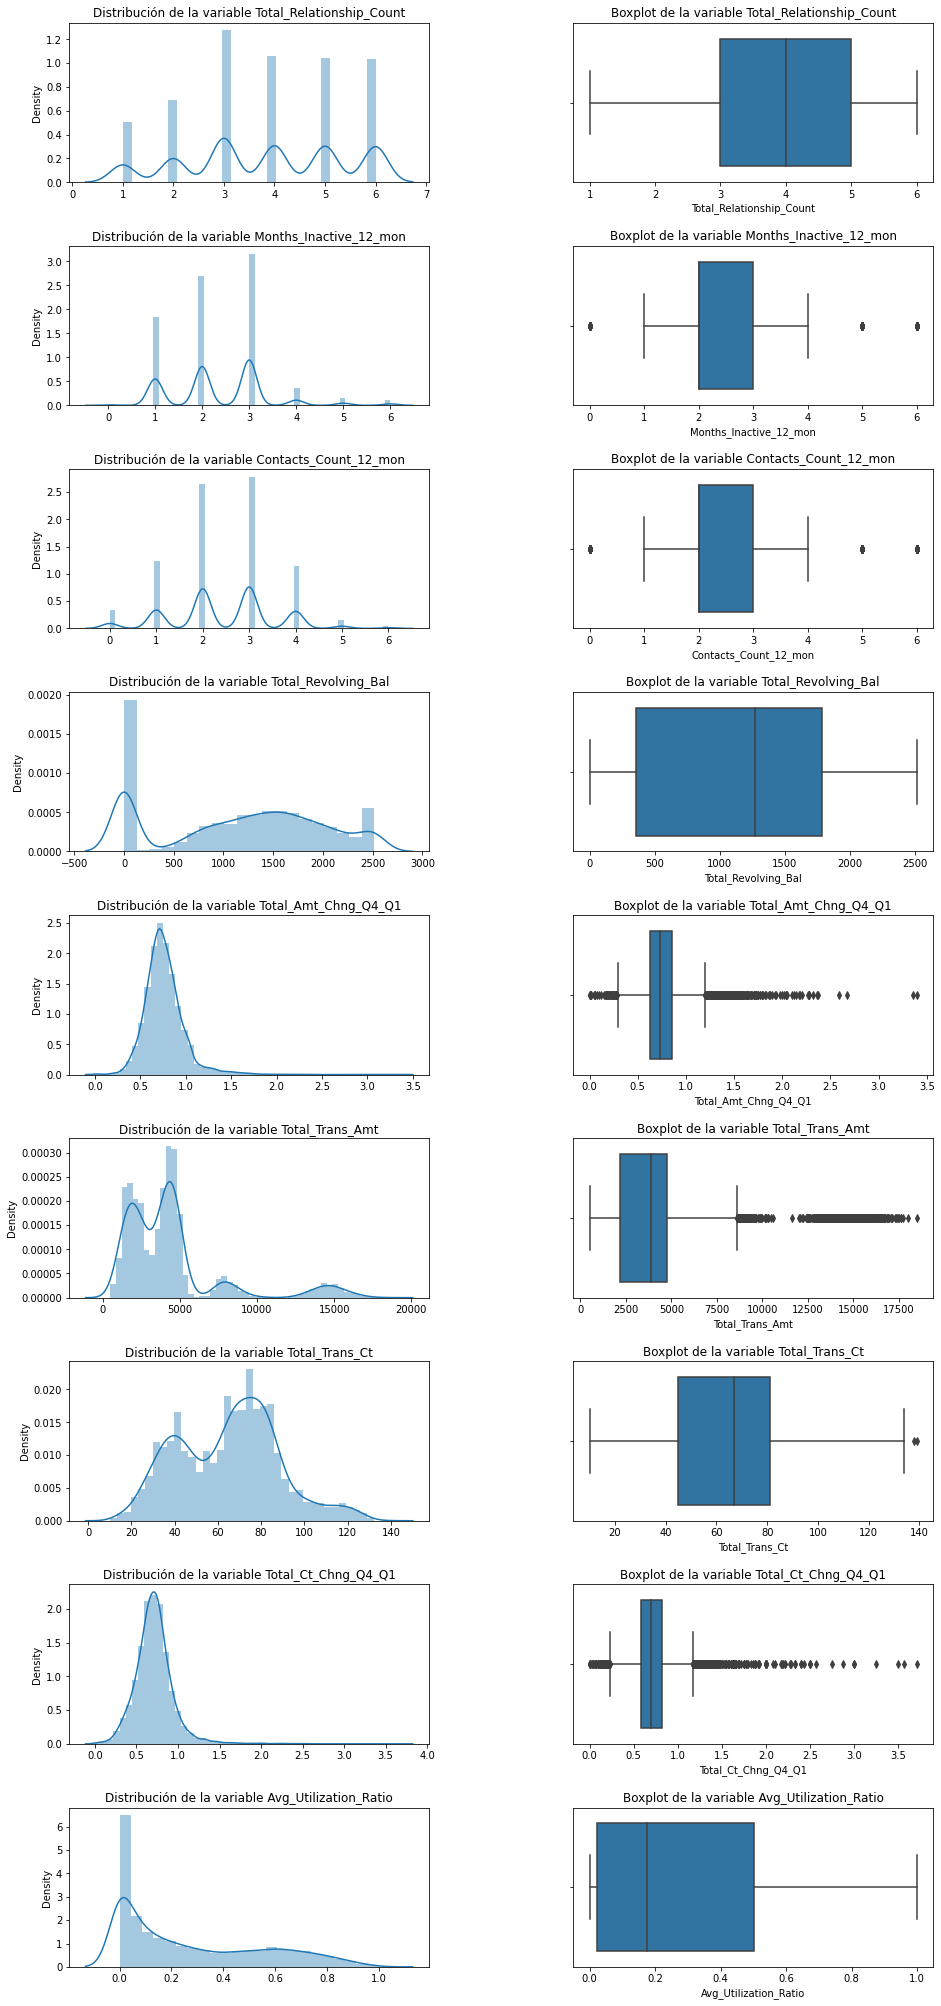

In [76]:
fig, axes = plt.subplots(nrows=len(columnas), ncols=2, figsize=(15,30))
for index, col in enumerate(columnas):
  axes[index][0].set_title(f"Distribución de la variable {col}")
  sns.distplot(x=df[col], ax=axes[index][0])
  axes[index][1].set_title(f"Boxplot de la variable {col}")
  sns.boxplot(x=df[col], ax=axes[index][1])
  
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

Como se puede apreciar en los boxplots, 6 de las 9 features graficadas contienen valores outliers. Por lo cual, se procederá a definir una función para eliminarlos.

In [77]:
def remove_outliers(df:pd.DataFrame,columna:str)->pd.DataFrame:
  Q1 = df[columna].quantile(0.25)
  Q3 = df[columna].quantile(0.75)
  IQR = Q3 - Q1
  MIN = Q1 - 1.5 * IQR
  MAX = Q3 + 1.5 * IQR
  df_limpio = df[(df[columna] > MIN) & (df[columna] < MAX)]
  return df_limpio

In [78]:
df = remove_outliers(df,'Months_Inactive_12_mon')
df = remove_outliers(df,'Contacts_Count_12_mon')
df = remove_outliers(df,'Total_Amt_Chng_Q4_Q1')
df = remove_outliers(df,'Total_Trans_Amt')
df = remove_outliers(df,'Total_Trans_Ct')
df = remove_outliers(df,'Total_Ct_Chng_Q4_Q1')                                                                                   

Validemos que efectivamente se removieron los outliers.

In [79]:
def Graficamos_boxplot(df:pd.DataFrame,columna):
  for item in columna:
    fig = plt.figure(figsize=(6,3))
    ax = plt.axes()
    ax = sns.boxplot(x=df[item])
    ax.set_title(f"Boxplot de la variable {item}")
    plt.show()

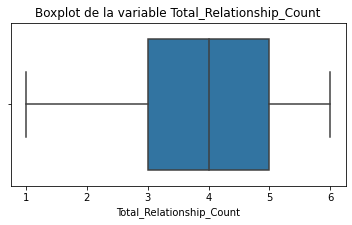

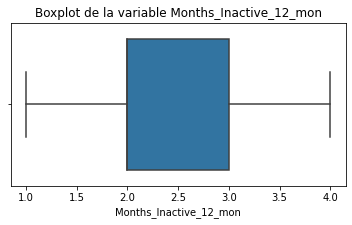

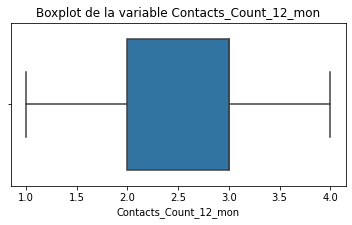

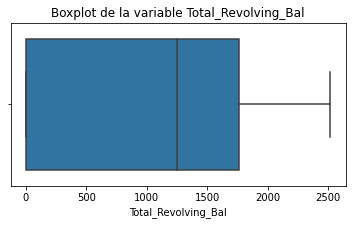

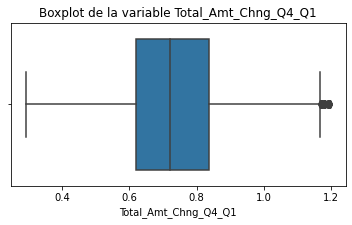

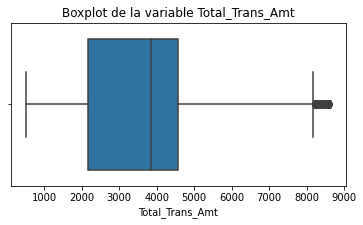

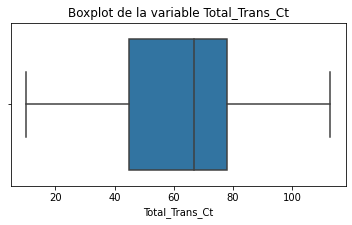

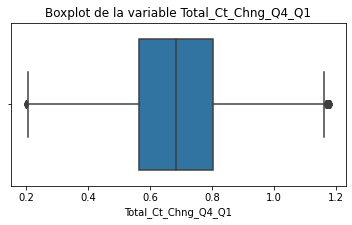

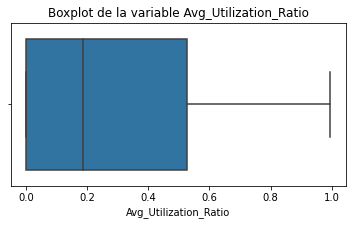

In [80]:
Graficamos_boxplot(df,columnas)

## **Modelos de Clasificación**
Entrenaremos 3 modelos:
1.   Decision tree
2.   SVC
3.   KNN

Además, optimizaremos hiper parámetros y realizaremos cross Validation mediante RandomizedSearchCV, en una primera instancia, para ir tanteando qué parámetros debemos pasarle a GridSearchCV ya en una segunda instancia, el cual se encargará de una búsqueda más exaustiva.
Al final de cada apartado, también reportaremos métricas que nos ayudarán a analizar y nos permitirán seleccionar el mejor modelo.

Volveremos a hacer train-test-split con el fin de evaluar nuestros modelos simulando la realidad.
Para ello, como hicimos anteriormente, tomaremos un test_size del 15% , un random_state de 42 y contemplaremos el desbalance de clases con el stratify. 

Comencemos separando las features de nuestro target.

In [81]:
X = df.drop('Att_Flag_Attrited_Customer', axis= 1)
y = df[['Att_Flag_Attrited_Customer']].copy()

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

In [83]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6609, 9)
(1167, 9)
(6609, 1)
(1167, 1)


##1.   Decision tree

In [84]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

Definamos un diccionario de parámetros que le pasaremos como argumento a nuestro randomsearch.

In [85]:
parameters = {'max_depth': [1,5,10,15,20,25,30,50],
    'min_samples_split': [1,5,10,15,20,25,30,50],
    'min_samples_leaf': [1,5,10,15,20,25,30,50]
    }

In [86]:
%%time
randomsearch_tree = RandomizedSearchCV( DecisionTreeClassifier(), parameters, n_jobs=-1, random_state = 42)
randomsearch_tree.fit(X_train, y_train)

CPU times: user 244 ms, sys: 45.9 ms, total: 290 ms
Wall time: 3.67 s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a float in 

¿Cuál es la mejor combinación de hiper parámetros entre aquellos pasados como argumento?

In [87]:
randomsearch_tree.best_estimator_

DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=20)

En función a lo resuelto por randomsearch, a continuación definiremos otro diccionario de parámetros que le pasaremos como argumento a gridsearch.

In [88]:
parameters = {
    'max_depth': [6,7,8,10,11,12,15,17],
    'min_samples_split': [10,12,14,15,16,18,20,22,25],
    'min_samples_leaf': [2,4,5,6,8]
    }

Instanciemos y entrenemos. También se medirá el tiempo que demora en entrenar.

In [89]:
%%time
gridsearch_tree = GridSearchCV( DecisionTreeClassifier(), parameters, n_jobs=-1)
gridsearch_tree.fit(X_train, y_train)

CPU times: user 3.1 s, sys: 220 ms, total: 3.32 s
Wall time: 36.7 s


Mejores parámetros:

In [90]:
gridsearch_tree.best_params_

{'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 16}

Una vez finalizado el entrenamiento podemos realizar las predicciones sobre los datos de testing que serán guardadas en la variable "test_preds".

In [91]:
test_preds = gridsearch_tree.predict(X_test)

Veamos ahora, qué tan bien diferencia entre clases el DecisionTreeClassifier.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


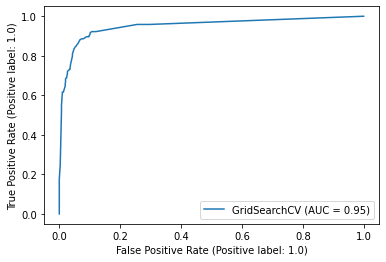

In [92]:
metrics.plot_roc_curve(gridsearch_tree, X_test, y_test)
plt.show()

Seguidamente, vamos a visualizar los resultados mediante:
*   Matriz de Confusión
*   Reporte de Clasificación

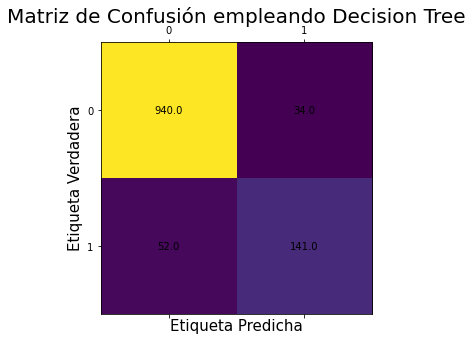

In [93]:
cm = confusion_matrix(y_test, test_preds)

fig, ax = plt.subplots(figsize=(10,5))
ax.matshow(cm)
plt.title('Matriz de Confusión empleando Decision Tree', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [94]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       974
         1.0       0.81      0.73      0.77       193

    accuracy                           0.93      1167
   macro avg       0.88      0.85      0.86      1167
weighted avg       0.92      0.93      0.92      1167



##2.   SVC

In [95]:
from sklearn.svm import SVC

Nuevamente, definamos un diccionario de parámetros que le pasaremos como argumento a nuestro randomsearch.

In [96]:
parameters = {
    'C': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
    'kernel': ["linear", "poly", "rbf", "sigmoid"]
    }

In [97]:
%%time
randomsearch_svc = RandomizedSearchCV( SVC(), parameters, n_jobs=-1, random_state = 42)
randomsearch_svc.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 31.2 s, sys: 422 ms, total: 31.6 s
Wall time: 13min 35s


¿Cuál es la mejor combinación de hiper parámetros entre aquellos pasados como argumento?

In [98]:
randomsearch_svc.best_estimator_

SVC(C=0.001, kernel='linear')

De acuerdo al resultado anterior, definamos diccionario de parámetros para gridsearch.

In [99]:
parameters = {
    'C': [0.0008, 0.0009, 0.001, 0.0025, 0.005],
    'kernel': ["linear", "poly", "rbf", "sigmoid"]
    }

Instanciemos y entrenemos

In [100]:
%%time
gridsearch_svc = GridSearchCV( SVC(), parameters, n_jobs=-1)
gridsearch_svc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 26.2 s, sys: 318 ms, total: 26.5 s
Wall time: 10min 52s


Mejores parámetros

In [101]:
gridsearch_svc.best_params_

{'C': 0.0009, 'kernel': 'linear'}

Ahora, generemos las predicciones sobre los datos de testing.

In [102]:
test_preds = gridsearch_svc.predict(X_test)

Veamos qué tan bien diferencia entre clases el SupportVectorClassifier.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


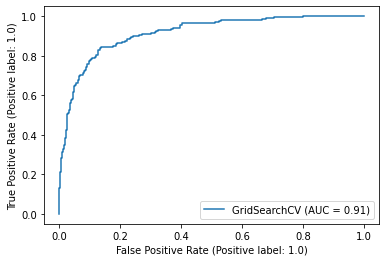

In [103]:
metrics.plot_roc_curve(gridsearch_svc, X_test, y_test)
plt.show()

Nuevamente, visualicemos los resultados mediante:

*   Matriz de Confusión
*   Reporte de Clasificación

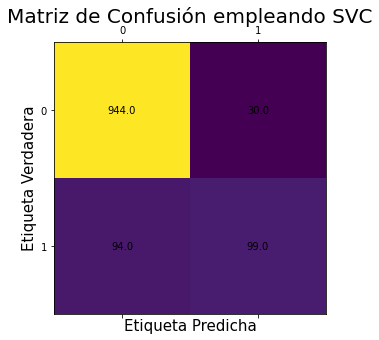

In [104]:
cm = confusion_matrix(y_test, test_preds)

fig, ax = plt.subplots(figsize=(10,5))
ax.matshow(cm)
plt.title('Matriz de Confusión empleando SVC', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [105]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       974
         1.0       0.77      0.51      0.61       193

    accuracy                           0.89      1167
   macro avg       0.84      0.74      0.78      1167
weighted avg       0.89      0.89      0.88      1167



##3.   KNN

Para trabajar con KNN se requiere de un preprocesamiento previo, se debe llevar todo los datos a una misma escala. Para esto utilizaremos el StandardScaler de sklearn.

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

Instanciemos, entrenemos y transformemos las features numéricas.

In [107]:
scaler = StandardScaler()

In [108]:
columnas_numericas = ['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio']

In [109]:
scaler.fit(X_train[columnas_numericas])

StandardScaler()

In [110]:
X_train[columnas_numericas] = scaler.transform(X_train[columnas_numericas])
X_test[columnas_numericas] = scaler.transform(X_test[columnas_numericas])

Una vez más, definamos un diccionario de parámetros que le pasaremos como argumento a nuestro randomsearch.

In [111]:
parameters = {
    'n_neighbors': [1,5,10,15,20,25,30,50],
    'weights': ["uniform", "distance"]
    }

In [112]:
%%time
randomsearch_knn = RandomizedSearchCV( KNeighborsClassifier(), parameters, n_jobs=-1, random_state = 42)
randomsearch_knn.fit(X_train, y_train)

CPU times: user 190 ms, sys: 13.5 ms, total: 203 ms
Wall time: 3.27 s


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


¿Cuál es la mejor combinación de hiper parámetros entre aquellos pasados como argumento?

In [113]:
randomsearch_knn.best_estimator_

KNeighborsClassifier(n_neighbors=10, weights='distance')

En relación a lo resuelto inmediatamente arriba, definamos diccionario de parámetros a pasarle a gridsearch.

In [114]:
parameters = {
    'n_neighbors': [7,8,9,10,11,12],
    'weights': ["uniform", "distance"]
    }

Instanciemos, entrenemos y midamos el tiempo que demora en entrenar.

In [115]:
%%time
gridsearch_knn = GridSearchCV( KNeighborsClassifier(), parameters, n_jobs=-1)
gridsearch_knn.fit(X_train, y_train)

CPU times: user 184 ms, sys: 12.1 ms, total: 196 ms
Wall time: 3.62 s


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Mejores parámetros

In [116]:
gridsearch_knn.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

 Generemos las predicciones sobre el set de test.

In [117]:
test_preds = gridsearch_knn.predict(X_test)

Nuevamente, veamos qué tan bien diferencia entre clases el KNeighborsClassifier.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


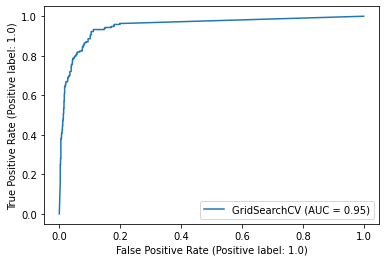

In [118]:
metrics.plot_roc_curve(gridsearch_knn, X_test, y_test)
plt.show()

Finalmente, visualicemos e imprimamos el reporte de métricas

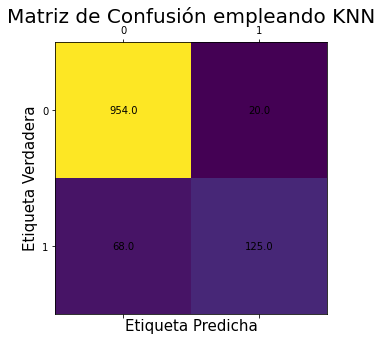

In [119]:
cm = confusion_matrix(y_test, test_preds)

fig, ax = plt.subplots(figsize=(10,5))
ax.matshow(cm)
plt.title('Matriz de Confusión empleando KNN', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [120]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96       974
         1.0       0.86      0.65      0.74       193

    accuracy                           0.92      1167
   macro avg       0.90      0.81      0.85      1167
weighted avg       0.92      0.92      0.92      1167



##**Conclusión**
Finalmente, haremos un gráfico comparativo de las distintas métricas obtenidas para los tres modelos de clasificación estudiados, que nos permitirá visualizar más facilmente y arribar al resultado buscado.

In [129]:
metrics_dict = {
    'Precision': [0.8, 0.77, 0.86],
    'Recall': [0.73, 0.51, 0.65],
    'F1-Score': [0.76, 0.61, 0.74],
    'Accuracy': [0.93, 0.89, 0.92],
    'AUC-ROC': [0.95, 0.91, 0.95],
    'Avg_Time': [20.5, 720, 3.5]
}

In [130]:
index= ['DecisionTreeClassifier','SupportVectorClassifier','KNeighborsClassifier']

In [131]:
metrics_df = pd.DataFrame(data= metrics_dict, index= index).T
metrics_df

,DecisionTreeClassifier,SupportVectorClassifier,KNeighborsClassifier
Precision,0.80,0.77,0.86
Recall,0.73,0.51,0.65
F1-Score,0.76,0.61,0.74
Accuracy,0.93,0.89,0.92
AUC-ROC,0.95,0.91,0.95
Avg_Time,20.50,720.00,3.50


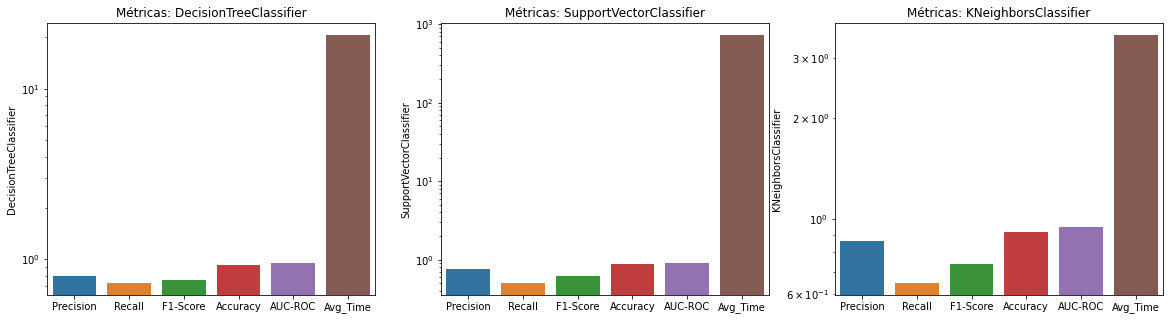

In [132]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
axes[0].set_title("Métricas: DecisionTreeClassifier")
sns.barplot(x= metrics_df.index, y= 'DecisionTreeClassifier', data= metrics_df, ax=axes[0])
axes[0].set_yscale('log')
axes[1].set_title("Métricas: SupportVectorClassifier")
sns.barplot(x= metrics_df.index, y= 'SupportVectorClassifier', data= metrics_df, ax=axes[1])
axes[1].set_yscale('log')
axes[2].set_title("Métricas: KNeighborsClassifier")
sns.barplot(x= metrics_df.index, y= 'KNeighborsClassifier', data= metrics_df, ax=axes[2])
axes[2].set_yscale('log')
plt.show()

Concluimos que de los tres modelos analizados, Decision Tree y KNN, tienen métricas muy semejantes, levemente superior el primero de ellos pero es ligeramente más rápido el segundo. A diferencia del SVC que sus métricas son un poco inferiores respecto a los anteriores pero lo más llamativo es el tiempo que demoró en entrenar ( 35 minutos contra 10 / 20 segundos).  